# House pricing Regression Model

* `Importing Libraries`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import missingno as msno

# sklearn - preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# sklearn - models
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

# sklearn - metrics
from sklearn.metrics import mean_squared_error, r2_score

# plt.style.use('ggplot')
pd.set_option("display.max_columns", None)

* `Read data`

In [2]:
FILEPATH = os.path.join(os.getcwd(), "data/train.csv")
df = pd.read_csv(FILEPATH)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [4]:
df.shape

(1460, 81)

In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# show statistics of the numeric data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# show statistics of the categorical data
df.describe(include="object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


* `Exploratory data analysis`

In [8]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
# Print the number of nans in the data
def nans(df):
    navalues = 0
    for i in range(len(df.columns)):
        navalues += df.isnull().sum()[i]

    print(navalues)


In [10]:
# drop unusful features
df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature", "Id", "Neighborhood", "Exterior1st", "Exterior2nd",
        "Condition1", "Condition2", "LotConfig", "BldgType", "MasVnrType"], axis=1, inplace=True)
df.shape

(1460, 67)

In [11]:
# Applying some feature engineering
df["total_rooms"] = df["FullBath"] + df["HalfBath"] + df["BedroomAbvGr"] 
df["FlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["LowQualFinSF"]
df["overallRate"] = df["OverallCond"] + df["OverallQual"]
df["placeAreaSF"] = df["WoodDeckSF"] + df["OpenPorchSF"] + df["EnclosedPorch"]
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,total_rooms,FlrSF,overallRate,placeAreaSF
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Gtl,2Story,7,5,2003,2003,Gable,CompShg,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,6,1710,12,61
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,Gtl,1Story,6,8,1976,1976,Gable,CompShg,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,5,1262,14,298
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Gtl,2Story,7,5,2001,2002,Gable,CompShg,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,6,1786,12,42
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Gtl,2Story,7,5,1915,1970,Gable,CompShg,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,4,1717,12,307
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,Gtl,2Story,8,5,2000,2000,Gable,CompShg,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,7,2198,13,276
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Gtl,1.5Fin,5,5,1993,1995,Gable,CompShg,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000,3,1362,10,70
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Gtl,1Story,8,5,2004,2005,Gable,CompShg,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000,5,1694,13,312
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Gtl,2Story,7,6,1973,1973,Gable,CompShg,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000,6,2090,13,667
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Gtl,1.5Fin,7,5,1931,1950,Gable,CompShg,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900,4,1774,12,295
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Gtl,1.5Unf,5,6,1939,1950,Gable,CompShg,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000,3,1077,11,4


In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr(method='spearman', numeric_only=True)

# Assuming 'SalePrice' is the target variable
target_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)

target_correlation

SalePrice        1.000000
OverallQual      0.809829
GrLivArea        0.731310
FlrSF            0.731310
GarageCars       0.690711
YearBuilt        0.652682
GarageArea       0.649379
FullBath         0.635957
overallRate      0.619701
TotalBsmtSF      0.602725
GarageYrBlt      0.593788
1stFlrSF         0.575408
YearRemodAdd     0.571159
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
total_rooms      0.514494
OpenPorchSF      0.477561
LotArea          0.456461
MasVnrArea       0.421309
LotFrontage      0.409076
placeAreaSF      0.386600
WoodDeckSF       0.353802
HalfBath         0.343008
BsmtFinSF1       0.301871
2ndFlrSF         0.293598
BedroomAbvGr     0.234907
BsmtFullBath     0.225125
BsmtUnfSF        0.185197
ScreenPorch      0.100070
MoSold           0.069432
3SsnPorch        0.065440
PoolArea         0.058453
MSSubClass       0.007192
BsmtHalfBath    -0.012189
YrSold          -0.029899
BsmtFinSF2      -0.038806
MiscVal         -0.062727
LowQualFinSF    -0.067719
OverallCond 

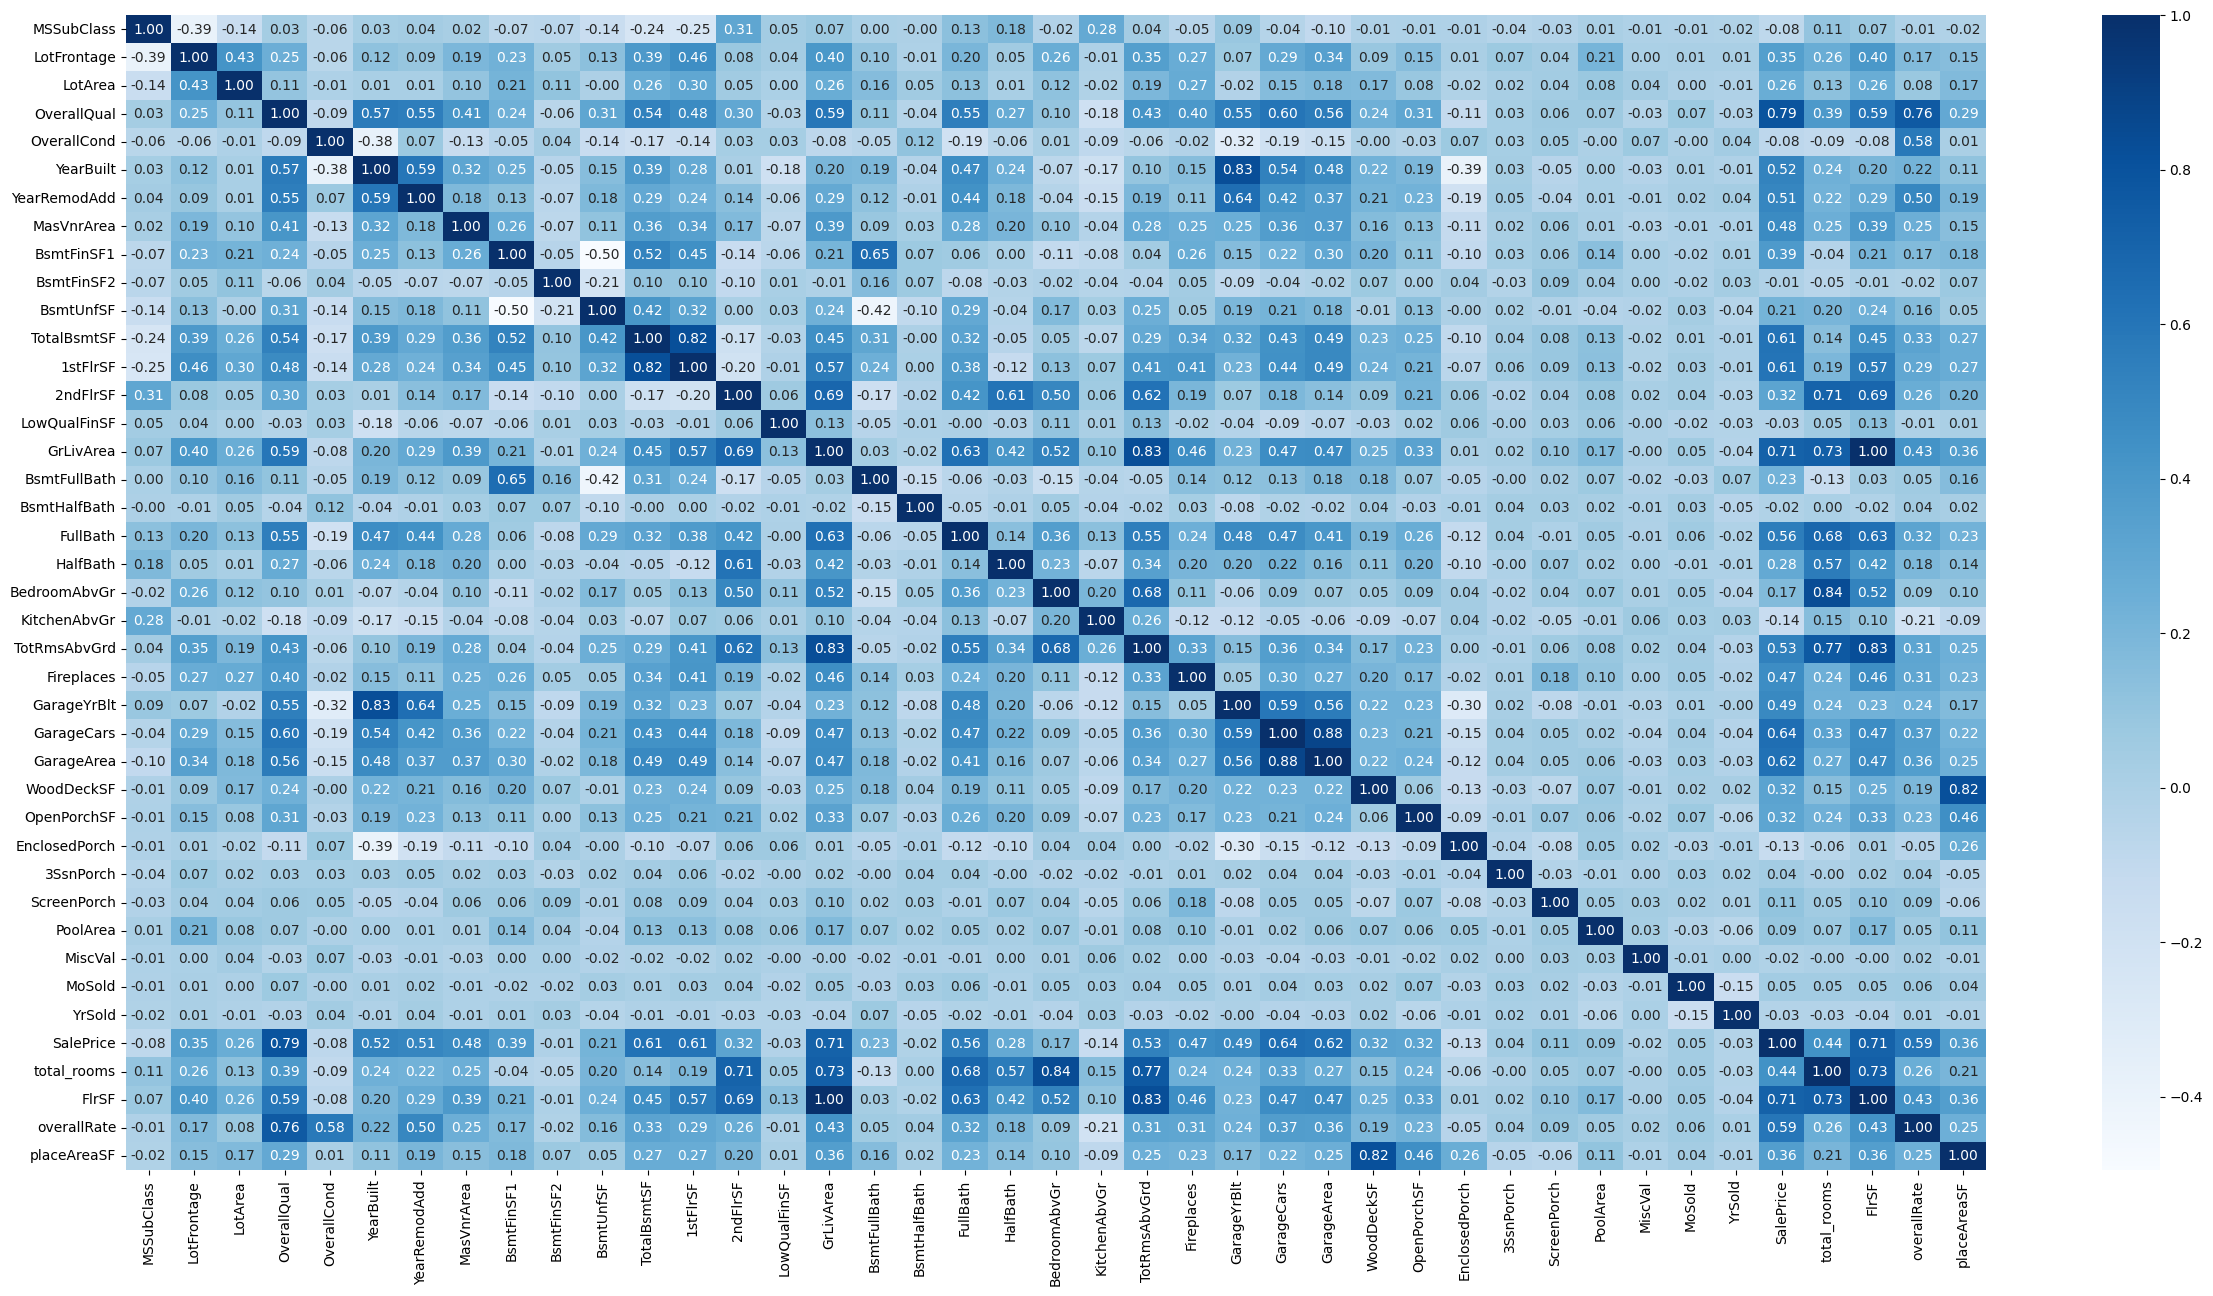

In [13]:
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", fmt=".2f")
plt.show()

* > I see that there are some features that have a low correlation to SalePrice

In [14]:
# Dropping Columns with least correlation to Saleprice
df.drop(columns=['MSSubClass', 'OverallCond','BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 
                "EnclosedPorch", '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], inplace=True)
df.shape

(1460, 59)

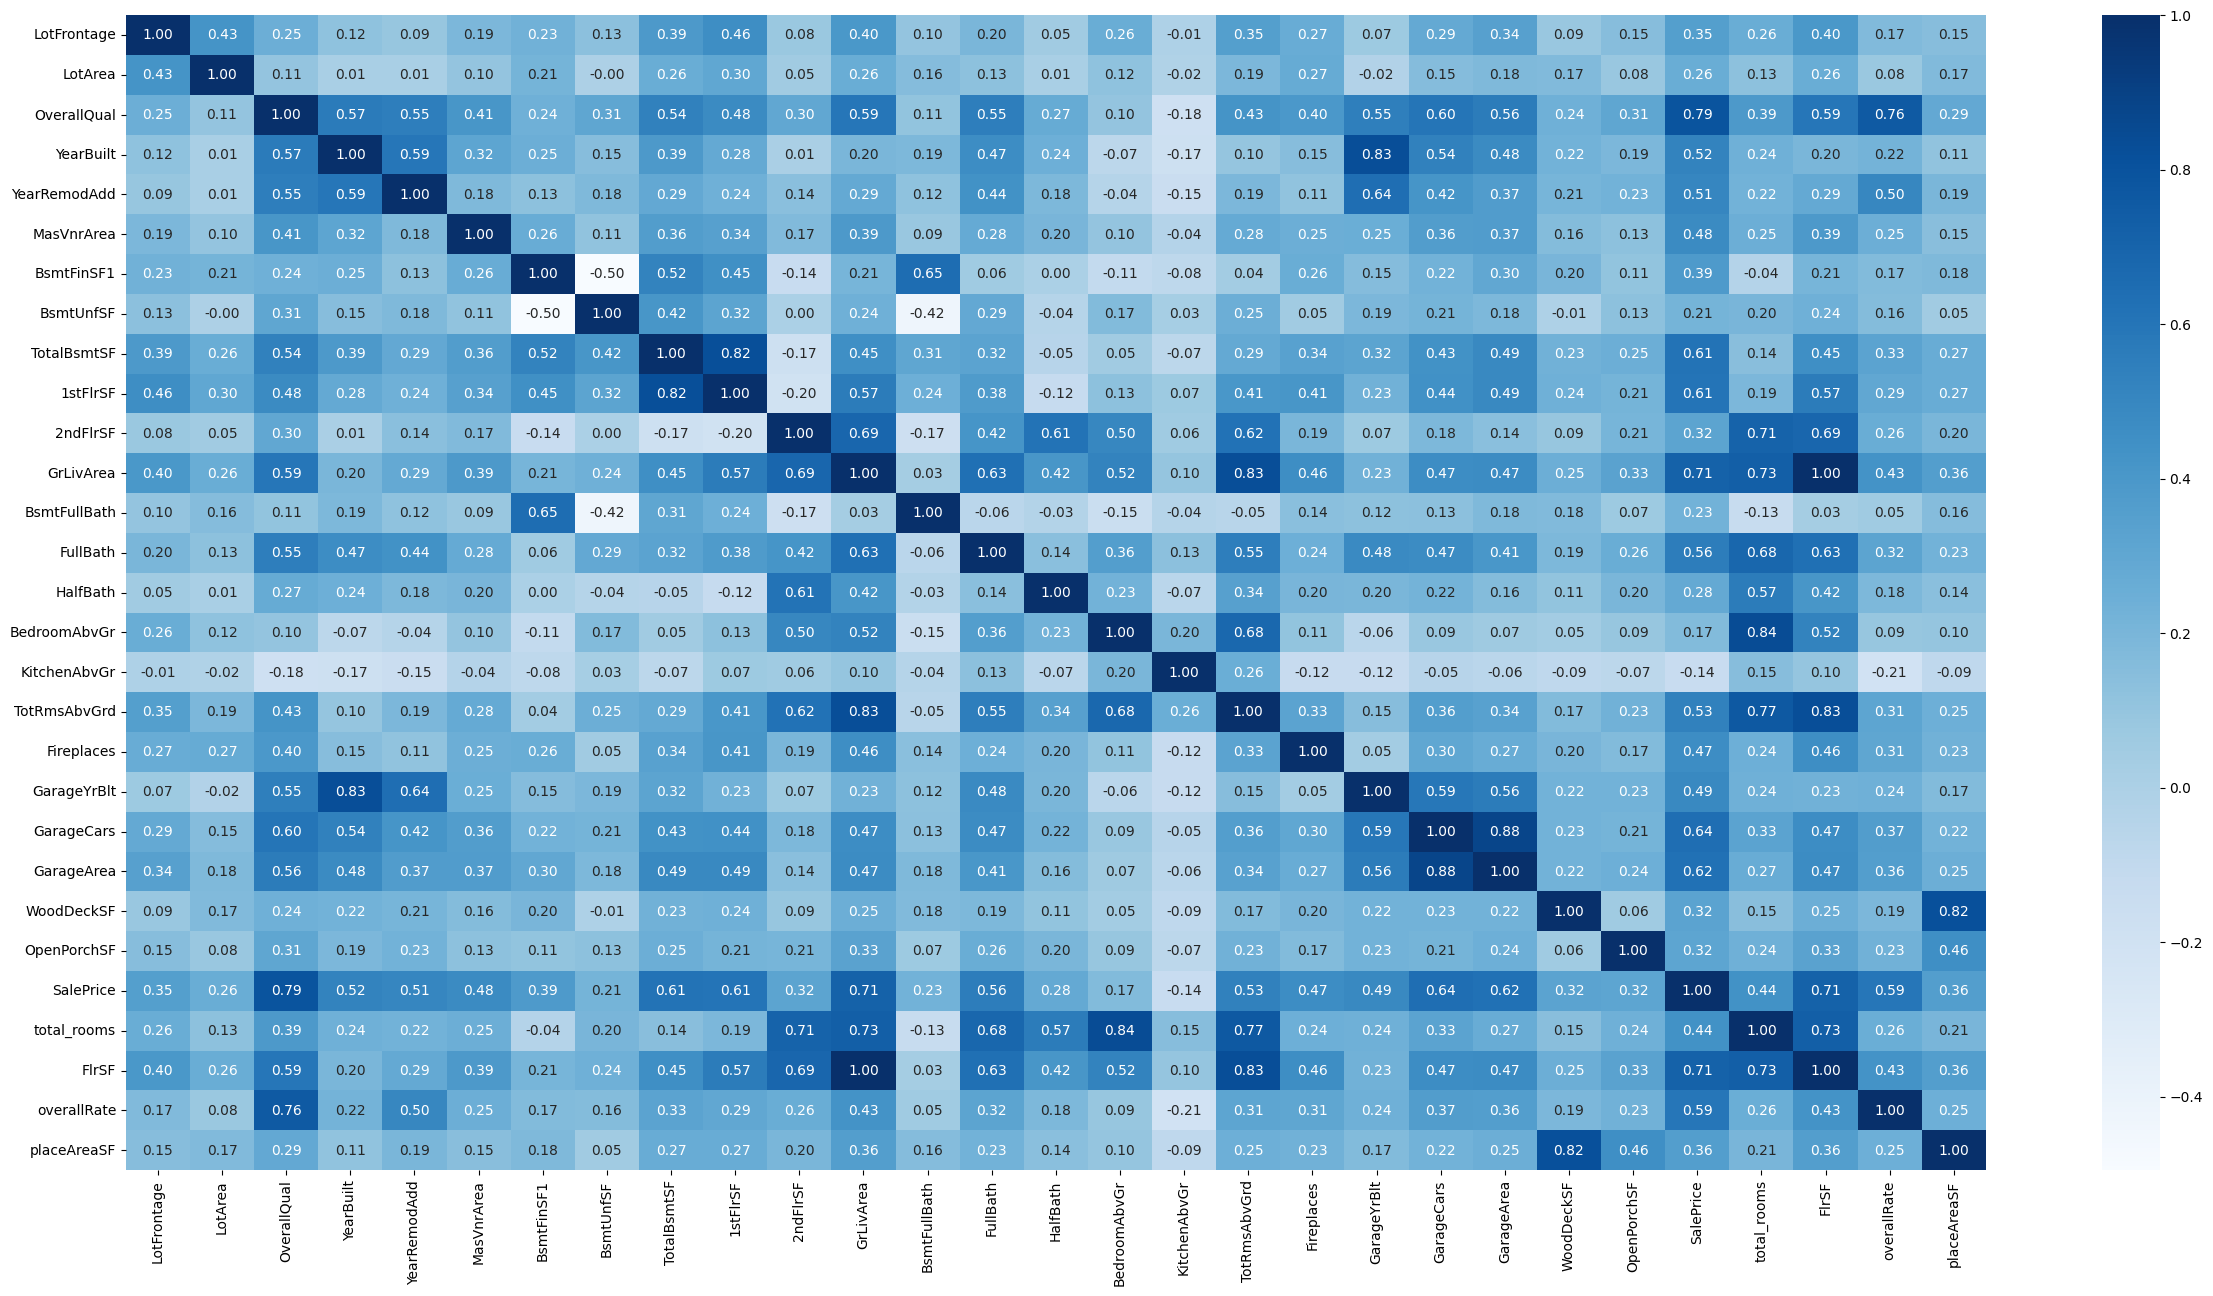

In [15]:
# Showing the heatmap after removing the uncorrelated features
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", fmt=".2f")
plt.show()

* > `That is alot better`

---

### `Data Viz & Data Handling`

* `Univariate Viz`

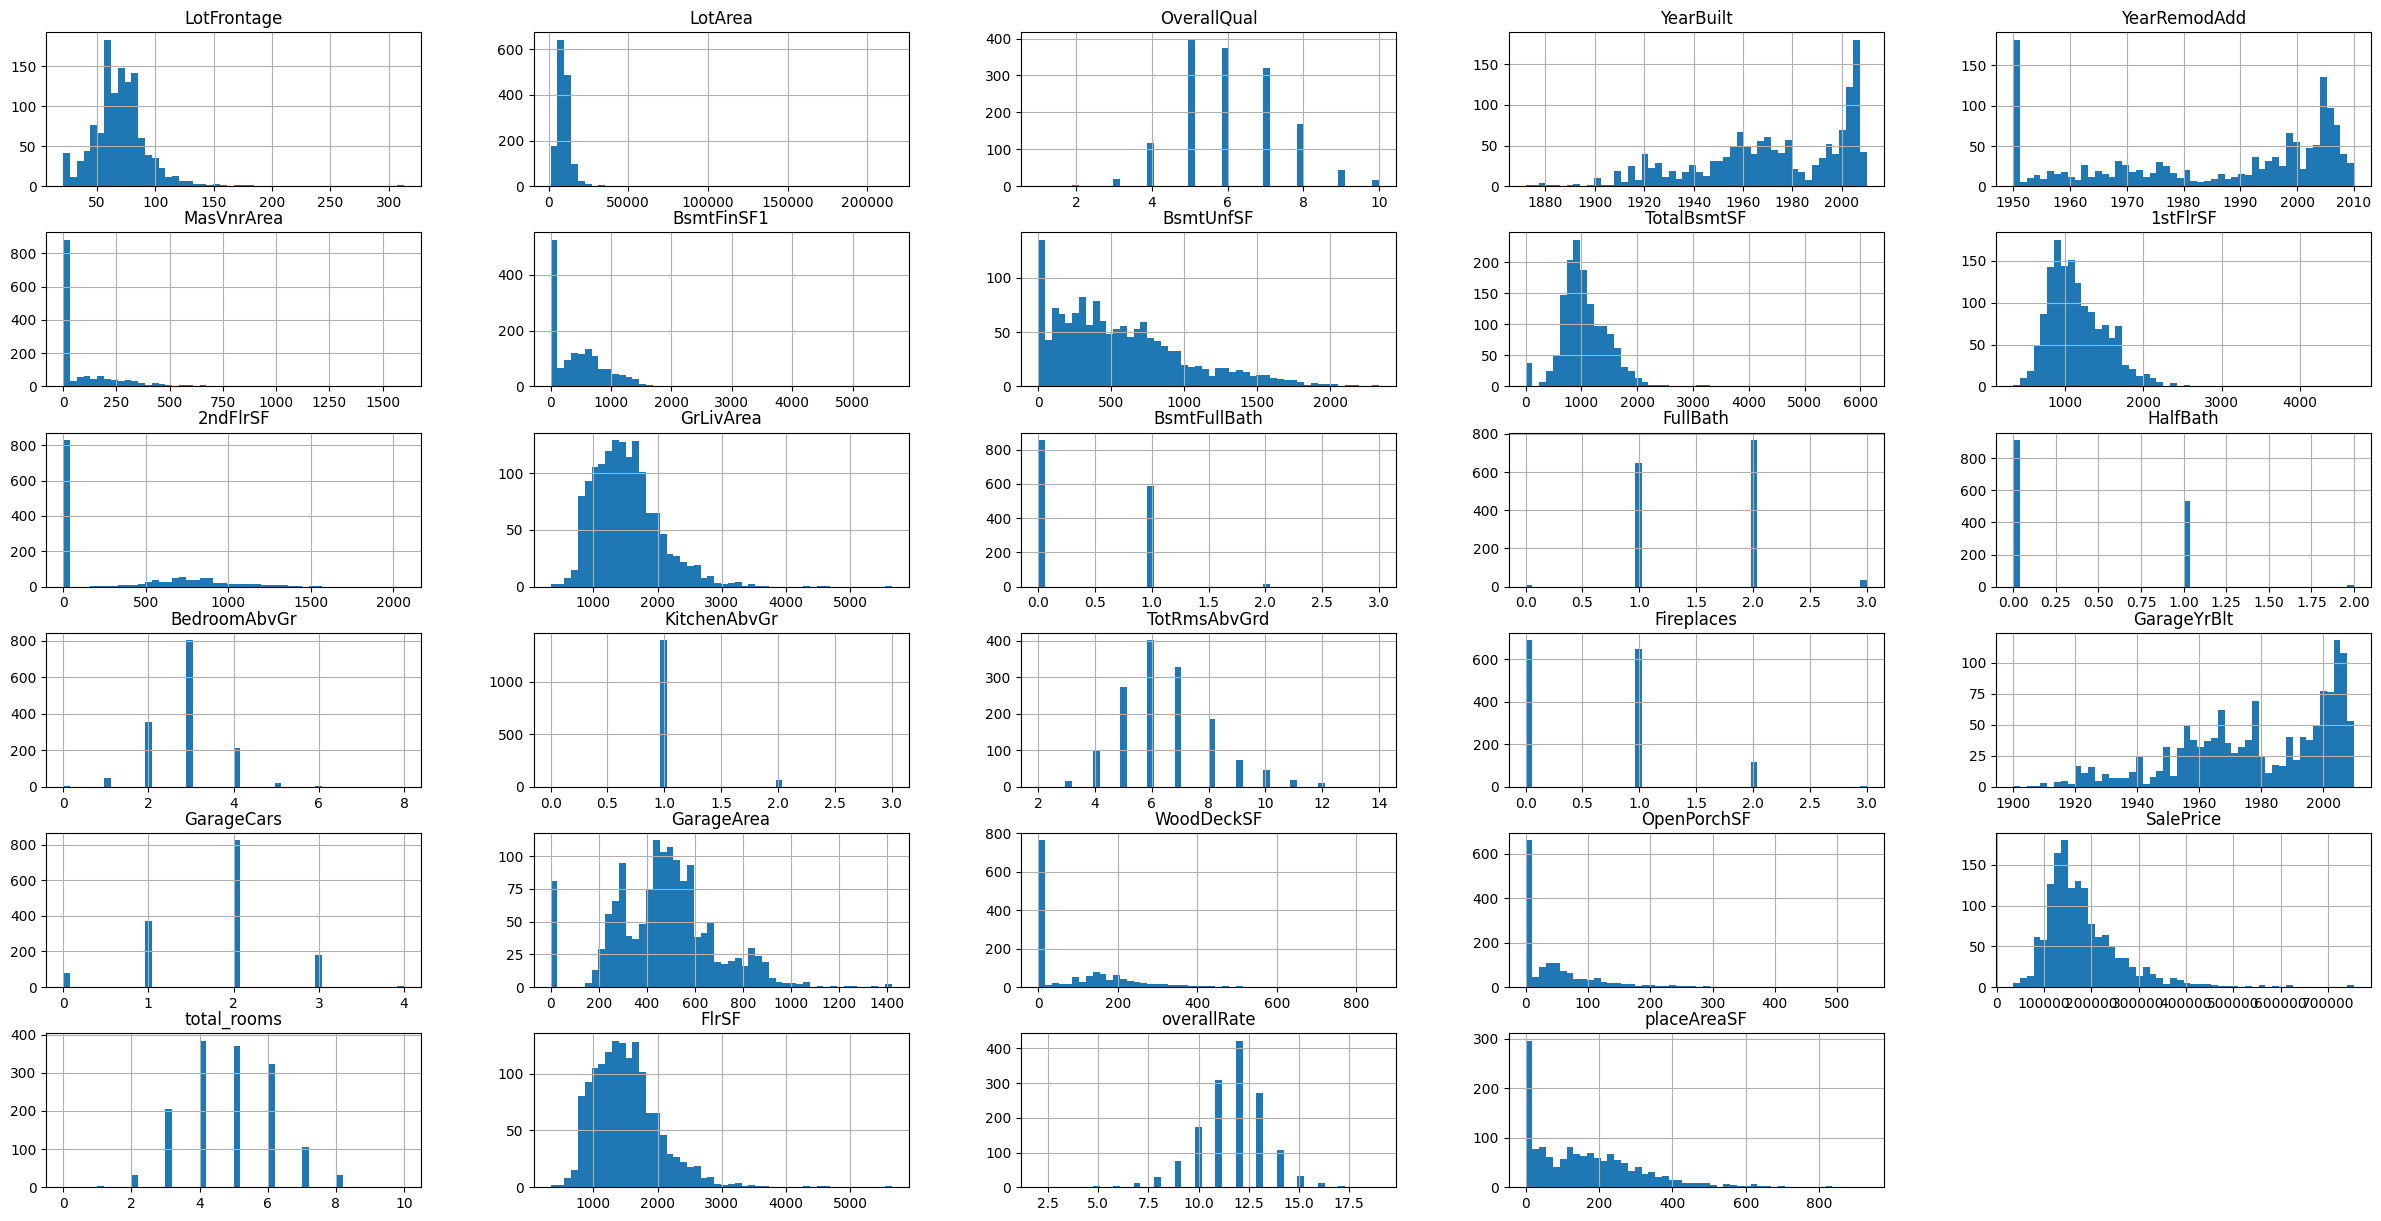

In [16]:
df.hist(bins=50, figsize=(30, 15))
plt.show()

In [17]:
# Handle Outliers
df.loc[df["LotFrontage"] > 150, "LotFrontage"] = 150
df.loc[df["MasVnrArea"] > 750, "MasVnrArea"] = 750
df.loc[df["BsmtFinSF1"] > 2000, "BsmtFinSF1"] = 2000
df.loc[df["BsmtUnfSF"] > 2000, "BsmtUnfSF"] = 2000 
df.loc[df["TotalBsmtSF"] > 2500, "TotalBsmtSF"] = 2500
df.loc[df["1stFlrSF"] > 2500, "1stFlrSF"] = 2500
df.loc[df["2ndFlrSF"] > 1500, "2ndFlrSF"] = 1500
df.loc[df["GrLivArea"] > 3500, "GrLivArea"] = 3500
df.loc[df["GarageArea"] > 1200, "GarageArea"] = 1200
df.loc[df["WoodDeckSF"] > 600, "WoodDeckSF"] = 600
df.loc[df["OpenPorchSF"] > 300, "OpenPorchSF"] = 300
df.loc[df["FlrSF"] > 3500, "FlrSF"] = 3500
df.loc[df["placeAreaSF"] > 700, "placeAreaSF"] = 700

df.drop(index=df[df["LotArea"] > 50000].index.to_list(), axis=0, inplace=True)
df.drop(index=df[df["YearBuilt"] < 1880].index.to_list(), axis=0, inplace=True)

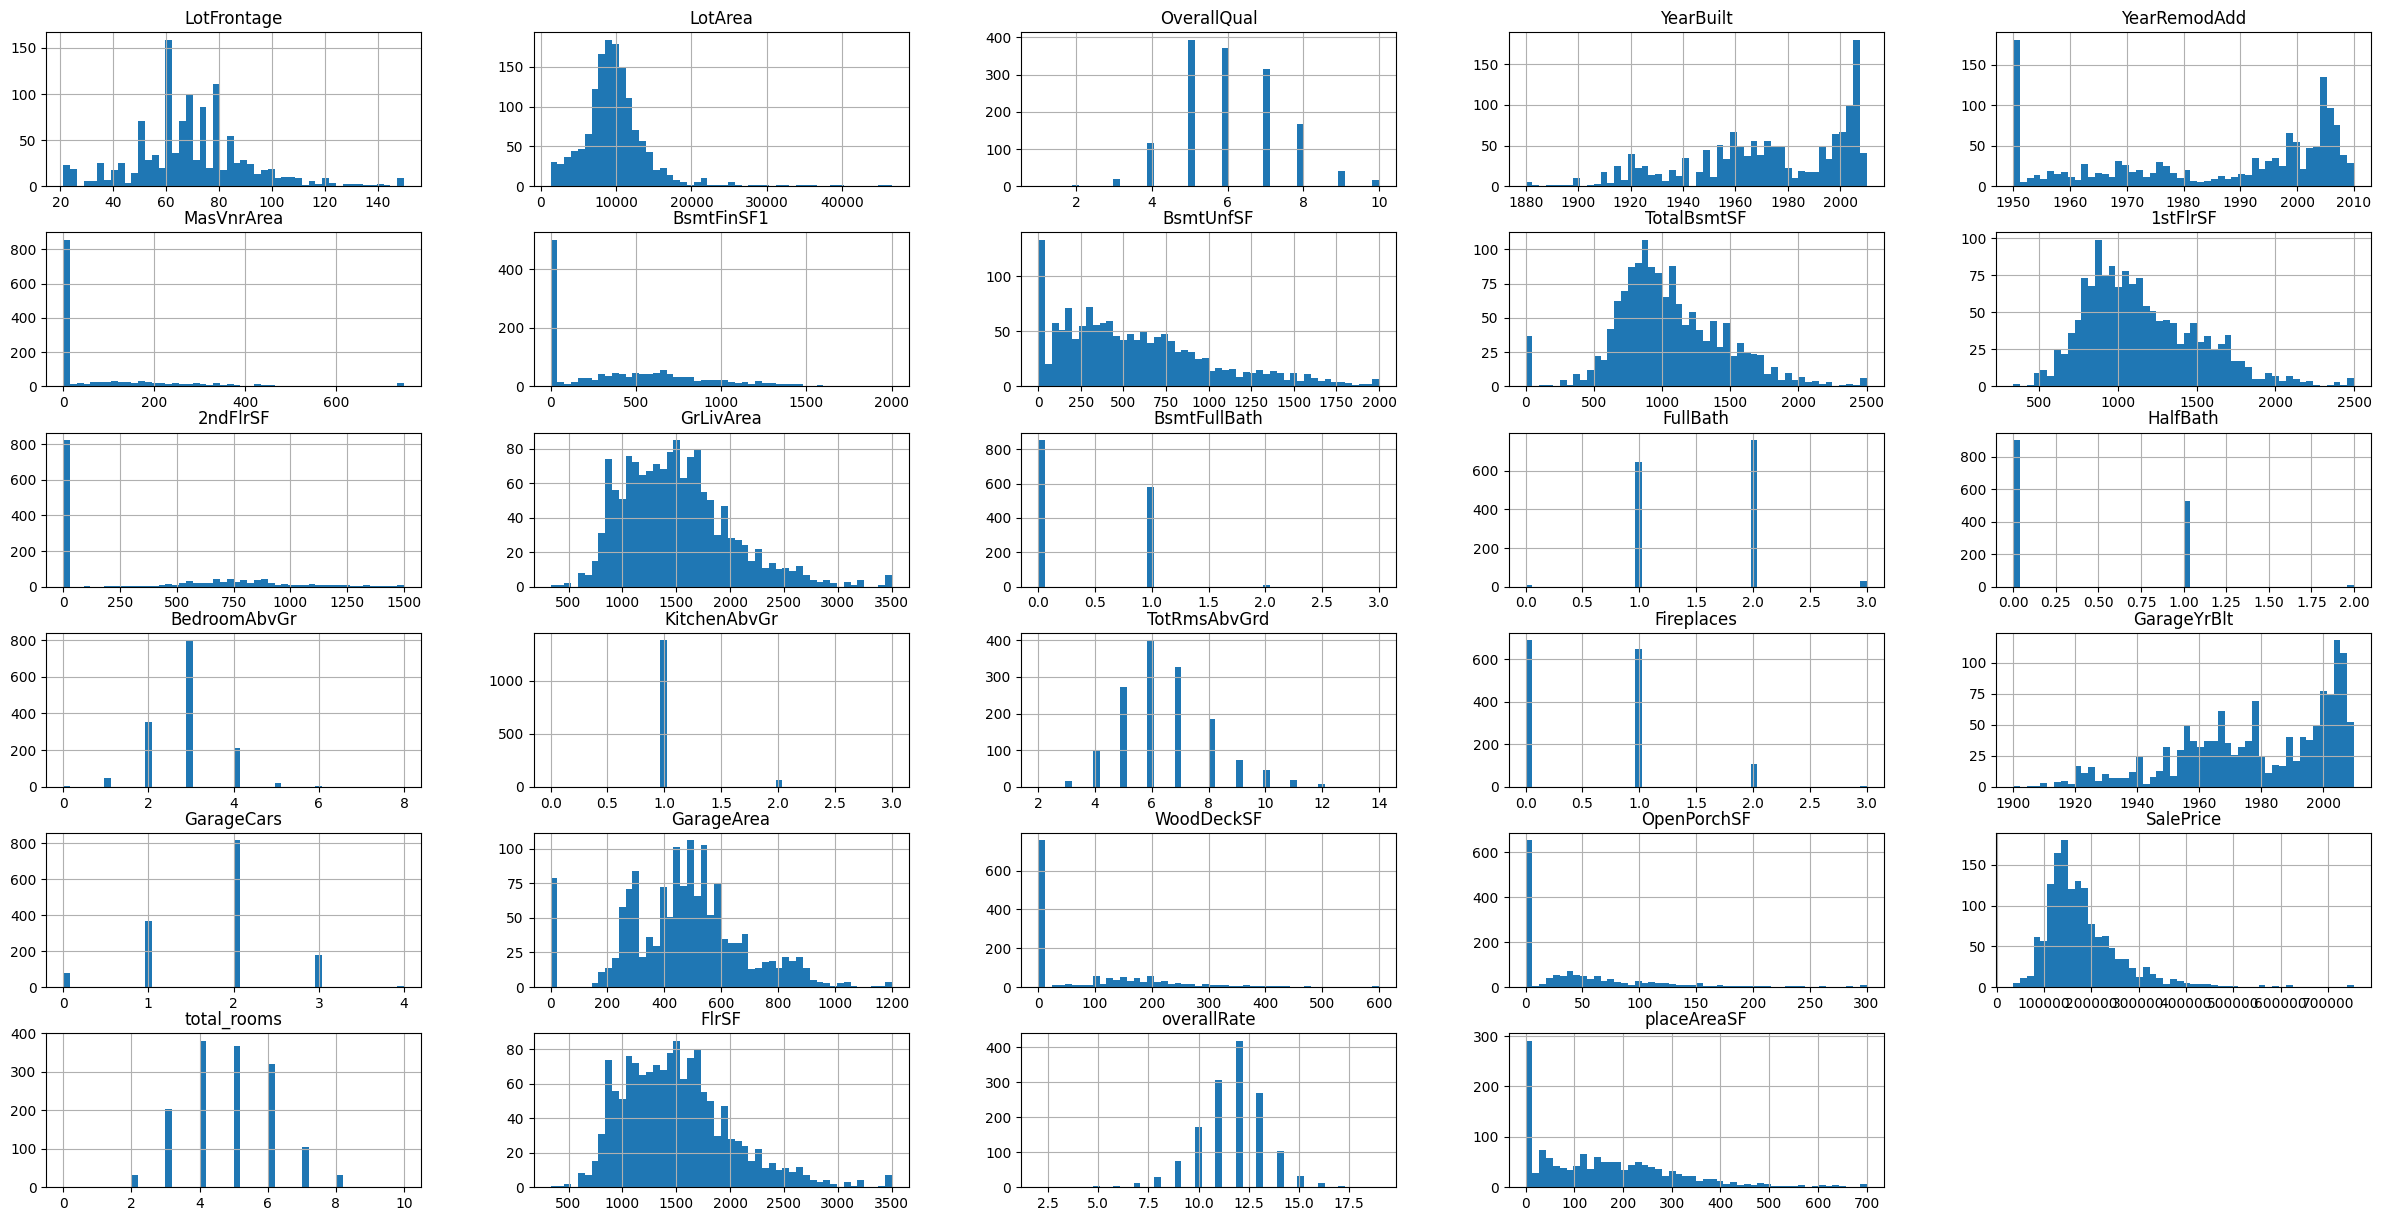

In [18]:
# Histograms after handling age coloumn
df.hist(bins=50, figsize=(30, 15)) 
plt.show()

In [19]:
df.describe(include="object")

,MSZoning,Street,LotShape,LandContour,Utilities,LandSlope,HouseStyle,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1447,1410,1410,1409,1410,1409,1447,1447,1447,1446,1447,1447,1368,1368,1368,1368,1447,1447,1447
unique,5,2,4,4,2,3,8,6,7,4,5,6,4,4,4,6,6,6,5,2,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Gtl,1Story,Gable,CompShg,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1139,1442,923,1309,1446,1378,720,1132,1425,898,1271,644,645,1299,951,429,1246,1417,736,1354,1321,730,1350,861,602,1300,1315,1329,1255,1186


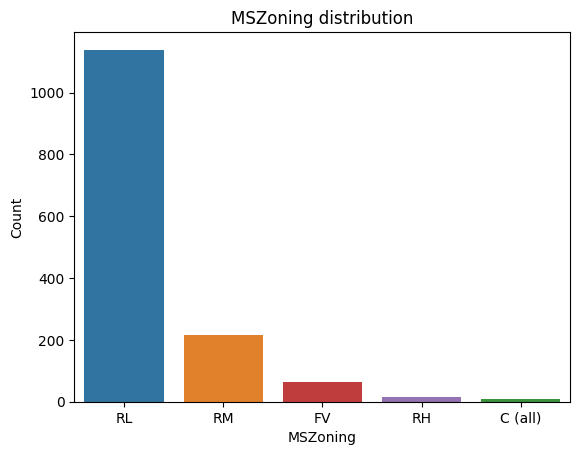

In [20]:
# Countplot for Geography Column
sns.countplot(df, x="MSZoning", order=df["MSZoning"].value_counts().index.tolist(),  legend=False, hue="MSZoning")

plt.title("MSZoning distribution")
plt.xlabel("MSZoning")
plt.ylabel("Count")
plt.show()

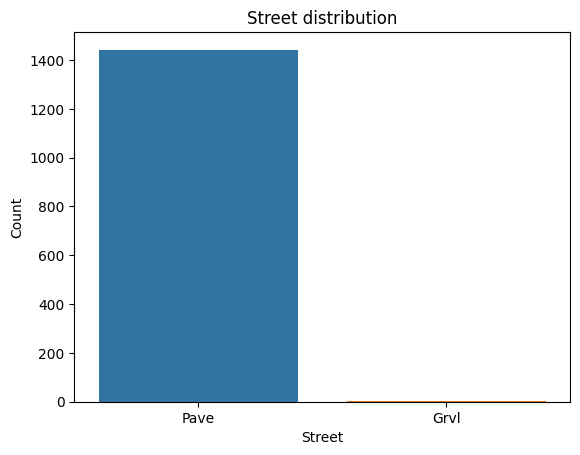

In [21]:
# Countplot for Gender Column
sns.countplot(df, x="Street", order=df["Street"].value_counts().index.tolist(), legend=False, hue="Street")

plt.title("Street distribution")
plt.xlabel("Street")
plt.ylabel("Count")
plt.show()

* `Showing Nans`

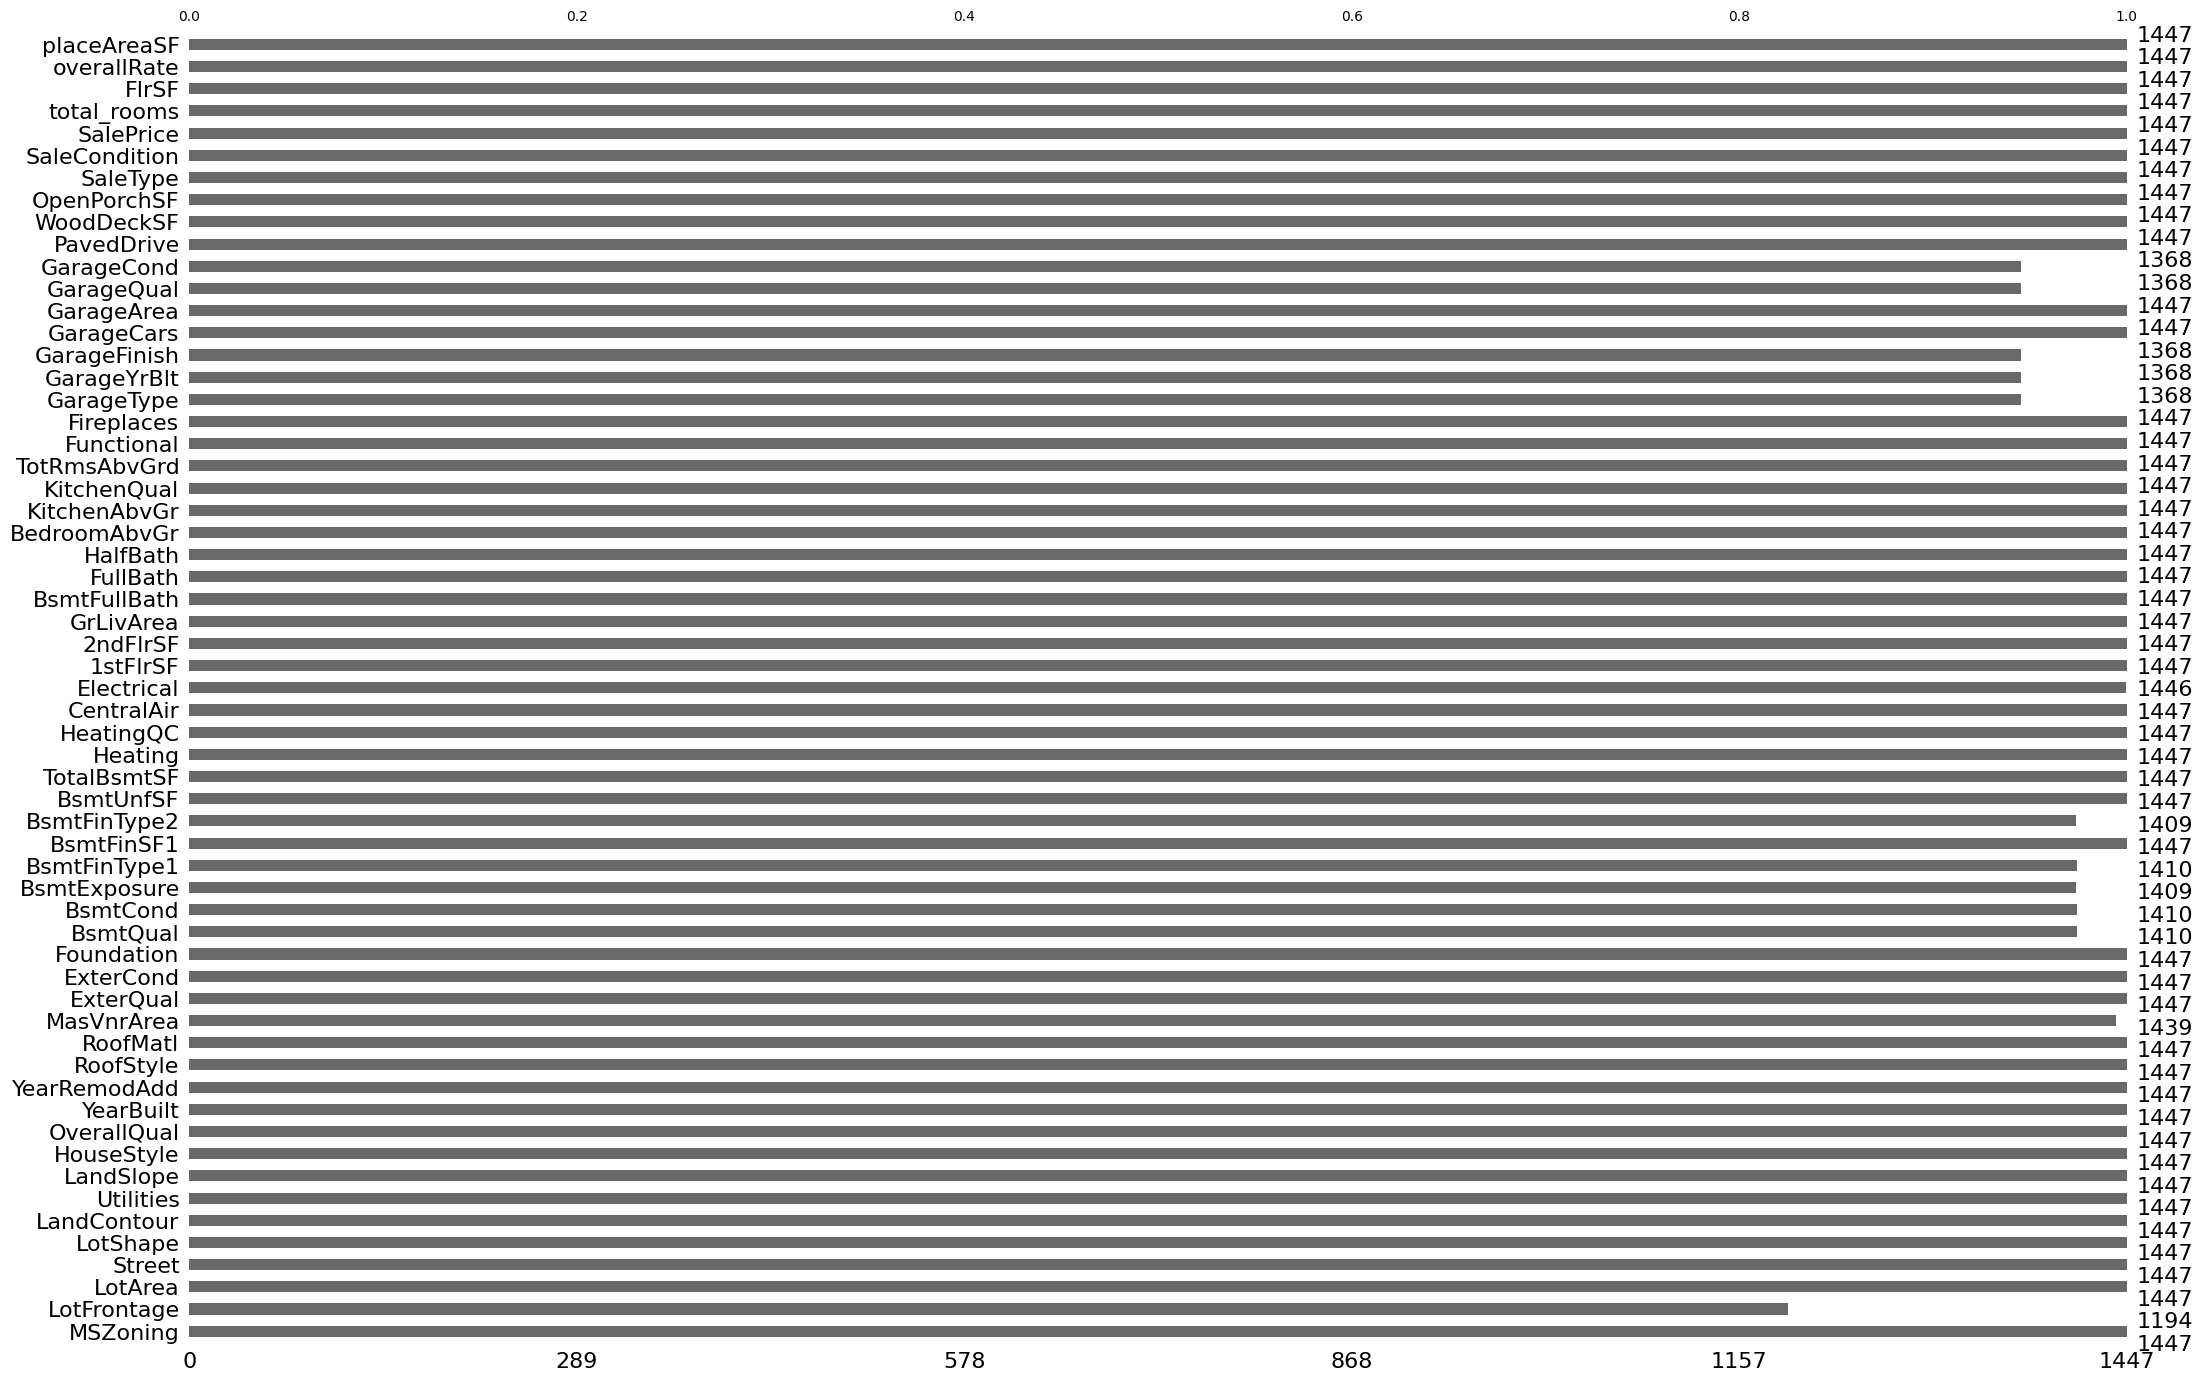

In [22]:
msno.bar(df);

---

* `Splitting dataset into train & test`

In [23]:
X = df.drop(columns="SalePrice", axis=1)
y = df["SalePrice"]

X.shape, y.shape

((1447, 58), (1447,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

## Train data stratified on y
print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
## Test data stratified on y
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)


X_train.shape 	 (1229, 58)
y_train.shape 	 (1229,)
******************************
X_test.shape 	 (218, 58)
y_test.shape 	 (218,)


---

* `Data preprocessing & Pipline`

In [25]:
X_train.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,total_rooms,FlrSF,overallRate,placeAreaSF
486,RL,79.0,10289,Pave,Reg,Lvl,AllPub,Gtl,1Story,5,1965,1965,Hip,CompShg,168.0,TA,TA,CBlock,TA,TA,No,ALQ,836,Unf,237,1073,GasA,TA,Y,SBrkr,1073,0,1073,1,1,1,3,1,TA,6,Typ,0,Attchd,1965.0,RFn,2,515,TA,TA,Y,0,0,WD,Normal,5,1073,12,0
369,RL,NaN,9830,Pave,IR1,Lvl,AllPub,Gtl,1Story,5,1959,2006,Gable,CompShg,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,72,Rec,733,1063,GasA,Ex,Y,SBrkr,1287,0,1287,1,1,0,3,1,Gd,7,Typ,1,Detchd,1997.0,Fin,2,576,TA,TA,Y,364,17,WD,Normal,4,1287,12,381
1116,RL,NaN,7750,Pave,Reg,Lvl,AllPub,Gtl,SLvl,8,2002,2002,Hip,CompShg,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,353,Unf,55,408,GasA,Ex,Y,SBrkr,779,640,1419,1,2,1,3,1,Gd,7,Typ,1,BuiltIn,2002.0,Fin,2,527,TA,TA,Y,120,0,WD,Normal,6,1419,13,120
299,RL,80.0,14000,Pave,Reg,Lvl,AllPub,Gtl,1Story,6,1950,2004,Gable,CompShg,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,1092,1092,GasA,Ex,Y,SBrkr,1152,0,1152,0,1,0,3,1,Gd,6,Typ,1,Attchd,1950.0,Unf,1,300,TA,TA,Y,0,36,WD,Family,4,1152,14,36
209,RL,75.0,8250,Pave,Reg,Lvl,AllPub,Gtl,1Story,6,1964,1964,Hip,CompShg,260.0,TA,TA,CBlock,Gd,TA,No,Rec,787,Unf,305,1092,GasA,Ex,Y,SBrkr,1092,0,1092,1,1,0,3,1,TA,6,Typ,0,Attchd,1964.0,RFn,2,504,TA,Gd,Y,0,0,WD,Normal,4,1092,13,0


In [26]:
X_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LandSlope', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleType', 'SaleCondition',
       'total_rooms', 'FlrSF', 'overallRate', 'placeAreaSF'],
      dtype='object')

In [27]:
X_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LandSlope', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleType', 'SaleCondition',
       'total_rooms', 'FlrSF', 'overallRate', 'placeAreaSF'],
      dtype='object')

In [28]:
# Splitting the columns
num_cols = []
categ_cols = []

for col in X_train.columns:
    if isinstance(X_train[col][0], str):
        categ_cols.append(col)
    else:
        num_cols.append(col)

ready_cols = ["OverallQual", 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', "KitchenAbvGr", 'TotRmsAbvGrd',
            'Fireplaces', 'GarageCars', 'total_rooms']

num_cols = list(set(num_cols) - set(ready_cols))
categ_cols_1 = ['ExterQual', "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual",
                "GarageQual", "GarageCond"] # Label Encoding 
categ_cols_2 = list(set(categ_cols) - set(categ_cols_1)) # For OHE


print(f"numerical columns: {num_cols} -> {len(num_cols)}")
print(f"categorical columns 1: {categ_cols_1} -> {len(categ_cols_1)}")
print(f"categorical columns 2: {categ_cols_2} -> {len(categ_cols_2)}")
print(f"Ready columns {ready_cols} -> {len(ready_cols)}")
len(X_train.columns)


numerical columns: ['FlrSF', 'GarageArea', 'OpenPorchSF', '1stFlrSF', 'placeAreaSF', 'BsmtUnfSF', 'GarageYrBlt', 'GrLivArea', '2ndFlrSF', 'WoodDeckSF', 'LotFrontage', 'MasVnrArea', 'YearRemodAdd', 'TotalBsmtSF', 'overallRate', 'LotArea', 'YearBuilt', 'BsmtFinSF1'] -> 18
categorical columns 1: ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond'] -> 8
categorical columns 2: ['PavedDrive', 'LandContour', 'Utilities', 'Electrical', 'SaleCondition', 'CentralAir', 'HouseStyle', 'MSZoning', 'LotShape', 'SaleType', 'RoofMatl', 'Functional', 'Heating', 'BsmtExposure', 'GarageType', 'Foundation', 'LandSlope', 'RoofStyle', 'BsmtFinType2', 'BsmtFinType1', 'Street', 'GarageFinish'] -> 22
Ready columns ['OverallQual', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'total_rooms'] -> 10


58

In [29]:
X_train.head(10)

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,total_rooms,FlrSF,overallRate,placeAreaSF
486,RL,79.0,10289,Pave,Reg,Lvl,AllPub,Gtl,1Story,5,1965,1965,Hip,CompShg,168.0,TA,TA,CBlock,TA,TA,No,ALQ,836,Unf,237,1073,GasA,TA,Y,SBrkr,1073,0,1073,1,1,1,3,1,TA,6,Typ,0,Attchd,1965.0,RFn,2,515,TA,TA,Y,0,0,WD,Normal,5,1073,12,0
369,RL,NaN,9830,Pave,IR1,Lvl,AllPub,Gtl,1Story,5,1959,2006,Gable,CompShg,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,72,Rec,733,1063,GasA,Ex,Y,SBrkr,1287,0,1287,1,1,0,3,1,Gd,7,Typ,1,Detchd,1997.0,Fin,2,576,TA,TA,Y,364,17,WD,Normal,4,1287,12,381
1116,RL,NaN,7750,Pave,Reg,Lvl,AllPub,Gtl,SLvl,8,2002,2002,Hip,CompShg,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,353,Unf,55,408,GasA,Ex,Y,SBrkr,779,640,1419,1,2,1,3,1,Gd,7,Typ,1,BuiltIn,2002.0,Fin,2,527,TA,TA,Y,120,0,WD,Normal,6,1419,13,120
299,RL,80.0,14000,Pave,Reg,Lvl,AllPub,Gtl,1Story,6,1950,2004,Gable,CompShg,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,1092,1092,GasA,Ex,Y,SBrkr,1152,0,1152,0,1,0,3,1,Gd,6,Typ,1,Attchd,1950.0,Unf,1,300,TA,TA,Y,0,36,WD,Family,4,1152,14,36
209,RL,75.0,8250,Pave,Reg,Lvl,AllPub,Gtl,1Story,6,1964,1964,Hip,CompShg,260.0,TA,TA,CBlock,Gd,TA,No,Rec,787,Unf,305,1092,GasA,Ex,Y,SBrkr,1092,0,1092,1,1,0,3,1,TA,6,Typ,0,Attchd,1964.0,RFn,2,504,TA,Gd,Y,0,0,WD,Normal,4,1092,13,0
635,RH,60.0,10896,Pave,Reg,Bnk,AllPub,Gtl,2.5Fin,6,1914,1995,Hip,CompShg,0.0,Fa,TA,CBlock,TA,Fa,No,LwQ,256,Unf,1184,1440,GasA,Ex,Y,FuseA,1440,1440,3395,0,2,0,8,2,Fa,14,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,110,WD,Abnorml,10,3395,13,110
501,FV,75.0,9803,Pave,Reg,Lvl,AllPub,Gtl,2Story,7,2005,2005,Gable,CompShg,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,400,Unf,466,866,GasA,Gd,Y,SBrkr,866,902,1768,0,2,1,3,1,Gd,7,Typ,0,Attchd,2005.0,RFn,2,603,TA,TA,Y,0,108,WD,Normal,6,1768,12,108
1175,RL,85.0,10678,Pave,Reg,Lvl,AllPub,Gtl,1.5Fin,8,1992,2000,Hip,CompShg,337.0,Gd,TA,PConc,Gd,TA,No,GLQ,700,Unf,983,1683,GasA,Ex,Y,SBrkr,2129,743,2872,0,2,1,4,1,Gd,9,Typ,1,Attchd,1992.0,Fin,2,541,TA,TA,Y,0,33,WD,Normal,7,2872,13,33
59,RL,60.0,7200,Pave,Reg,Bnk,AllPub,Gtl,1Story,5,1972,1972,Gable,CompShg,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,632,Unf,148,780,GasA,Ex,Y,SBrkr,780,0,780,0,1,0,2,1,TA,4,Typ,0,Detchd,1973.0,Unf,1,352,TA,TA,Y,196,0,WD,Normal,3,780,12,196
786,RM,60.0,10800,Pave,Reg,Lvl,AllPub,Gtl,1.5Fin,5,1915,1950,Gable,CompShg,0.0,TA,Gd,PConc,Fa,TA,No,LwQ,686,Unf,0,686,GasA,TA,Y,SBrkr,966,686,1652,1,2,0,4,1,TA,7,Typ,0,Detchd,1961.0,Unf,1,416,TA,TA,Y,0,0,WD,Normal,6,1652,11,196


In [30]:
# Pipline

# Numerical: num_cols --> Imputing using median, and StandardScaler
# Categorical: categ_cols_1 --> Imputing using constant, and label encoding
# Categorical: categ_cols_2 --> Imputing using mode, and OHE
# Ready Cols: ready_cols --> Imputing mode

# For numerical
num_pipline = Pipeline(steps=[
                    ("imputer", SimpleImputer(strategy="median")),
                    ("scaler", StandardScaler())
])

# For Categorical label encoding
categ_pipline_1 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value="nan")),
    ("label enc", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# For Categorical OHE
categ_pipline_2 = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ohe", OneHotEncoder(sparse_output=False, drop='first'))
])

# For Ready Cols
ready_pipeline = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='most_frequent'))
                ])

all_pipeline = ColumnTransformer(transformers=[
    ("numerical", num_pipline, num_cols), 
    ("categorical label", categ_pipline_1, categ_cols_1),
    ("Categorical ohe", categ_pipline_2,categ_cols_2),
    ("ready", ready_pipeline, ready_cols)
])

# Apply
X_train_final = all_pipeline.fit_transform(X_train)
X_test_final = all_pipeline.transform(X_test)

In [31]:
# If you want to see the processed array
# Categorical columns after transformations (OrdinalEncoder and OneHotEncoder)
categ_cols_1_encoded = [f"{col}_ordinal" for col in categ_cols_1]
categ_cols_2_encoded = all_pipeline.named_transformers_['Categorical ohe']['ohe'].get_feature_names_out(categ_cols_2)

# Concatenate all the feature names
feature_names = num_cols + categ_cols_1_encoded + list(categ_cols_2_encoded) + ready_cols

# Convert the transformed array to a DataFrame
X_train_final_df = pd.DataFrame(X_train_final, columns=feature_names)

# Display the DataFrame
X_train_final_df.head()

,FlrSF,GarageArea,OpenPorchSF,1stFlrSF,placeAreaSF,BsmtUnfSF,GarageYrBlt,GrLivArea,2ndFlrSF,WoodDeckSF,LotFrontage,MasVnrArea,YearRemodAdd,TotalBsmtSF,overallRate,LotArea,YearBuilt,BsmtFinSF1,ExterQual_ordinal,ExterCond_ordinal,BsmtQual_ordinal,BsmtCond_ordinal,HeatingQC_ordinal,KitchenQual_ordinal,GarageQual_ordinal,GarageCond_ordinal,PavedDrive_P,PavedDrive_Y,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,CentralAir_Y,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,LandSlope_Mod,LandSlope_Sev,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Street_Pave,GarageFinish_RFn,GarageFinish_Unf,OverallQual,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,total_rooms
0,-0.863344,0.206812,-0.734968,-0.226324,-1.129090,-0.746876,-0.582287,-0.863344,-0.799078,-0.776603,0.458715,0.406434,-0.979679,0.056855,0.175952,0.085464,-0.232508,0.925329,3.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,1.0,1.0,1.0,3.0,1.0,6.0,0.0,2.0,5.0
1,-0.438342,0.499721,-0.462274,0.356130,1.515656,0.372445,0.747727,-0.438342,-0.799078,2.261648,0.002926,-0.608272,1.016804,0.032260,0.175952,-0.014509,-0.433364,-0.848552,3.0,2.0,3.0,3.0,0.0,2.0,4.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,1.0,0.0,3.0,1.0,7.0,1.0,2.0,4.0
2,-0.176191,0.264434,-0.734968,-1.026517,-0.296099,-1.157595,0.955542,-0.176191,0.675230,0.225018,0.002926,-0.608272,0.822025,-1.578726,0.783383,-0.467549,1.006107,-0.196117,2.0,4.0,2.0,3.0,0.0,2.0,4.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,1.0,2.0,1.0,3.0,1.0,7.0,1.0,2.0,6.0
3,-0.706451,-0.825570,-0.157498,-0.011306,-0.879193,1.182598,-1.205731,-0.706451,-0.799078,-0.776603,0.509358,-0.608272,0.919415,0.103586,1.390813,0.893748,-0.734649,-1.015724,3.0,2.0,3.0,3.0,0.0,2.0,4.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0

In [32]:
# Check train
X_train_final.shape, y_train.shape

((1229, 124), (1229,))

In [33]:
# Check test
X_test_final.shape, y_test.shape

((218, 124), (218,))

In [34]:
# Dump the pipeline locally in ARTIFACTS_FOLDER_PATH
ARTIFACTS_FOLDER_PATH = os.path.join(os.getcwd(), '..', 'artifacts')
os.makedirs(ARTIFACTS_FOLDER_PATH, exist_ok=True)

In [35]:
# Dump the pipeline locally --> Serialzation
joblib.dump(all_pipeline, os.path.join(ARTIFACTS_FOLDER_PATH, 'pipeline.pkl'))

['c:\\Users\\YUSSEF\\OneDrive\\Desktop\\Projects\\House_Pricing_Regression\\notebooks\\..\\artifacts\\pipeline.pkl']

---

---

### `Building Models`

> Evaluation Metric is RMSE

* `Logistic Regression`

In [36]:
# Linear Regression using OLS
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train)

LinearRegression()

In [37]:
# Cross validation on 5 folds
mse_score_lin = cross_val_score(estimator=lin_reg, X=X_train_final, y=y_train, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

mse_score_lin = -1 * mse_score_lin
rmse_score_lin = np.sqrt(mse_score_lin)
rmse_score_lin

array([3.27054705e+04, 3.68661111e+11, 3.89661463e+04, 3.18594440e+04,
       2.86733614e+04])

In [38]:
# predict using cross validation
y_pred_lin = cross_val_predict(estimator=lin_reg, X=X_train_final, y=y_train, n_jobs=-1, cv=5, method='predict')
np.sqrt(mean_squared_error(y_train, y_pred_lin))

np.float64(164937322442.88193)

* `SGD`

In [39]:
# SGD model
sgd_reg = SGDRegressor(penalty="l2", alpha=0.001, eta0=0.0001,
                    learning_rate="constant", early_stopping=True, validation_fraction=0.1,
                    n_iter_no_change=5, random_state=42)

sgd_reg.fit(X_train_final, y_train)

SGDRegressor(alpha=0.001, early_stopping=True, eta0=0.0001,
             learning_rate='constant', random_state=42)

In [40]:
# Cross validation on 5 folds
mse_score_sgd = cross_val_score(estimator=sgd_reg, X=X_train_final, y=y_train, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

mse_score_sgd = -1 * mse_score_sgd
rmse_score_sgd = np.sqrt(mse_score_sgd)
rmse_score_sgd

array([29762.10071732, 30125.92641776, 34259.98607179, 31833.09503653,
       33226.1274809 ])

In [41]:
# predict using cross validation
y_pred_sgd = cross_val_predict(estimator=sgd_reg, X=X_train_final, y=y_train, n_jobs=-1, cv=5, method='predict')
np.sqrt(mean_squared_error(y_train, y_pred_sgd))

np.float64(31887.514476088494)

* `Lasso`

In [42]:
lasso_reg = Lasso(alpha=0.001, max_iter=10000, tol=0.001)
lasso_reg.fit(X_train_final, y_train)

c:\Users\YUSSEF\anaconda3\envs\depi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+11, tolerance: 7.628e+09
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001, max_iter=10000, tol=0.001)

In [43]:
# Cross validation on 5 folds
mse_score_lasso = cross_val_score(estimator=lasso_reg, X=X_train_final, y=y_train, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

mse_score_lasso = -1 * mse_score_lasso
rmse_score_lasso = np.sqrt(mse_score_lasso)
rmse_score_lasso

array([32705.32603945, 30866.29840907, 38963.47143635, 31859.3329608 ,
       28667.24371256])

In [44]:
# predict using cross validation
y_pred_lasso = cross_val_predict(estimator=lasso_reg, X=X_train_final, y=y_train, n_jobs=-1, cv=5, method='predict')
np.sqrt(mean_squared_error(y_train, y_pred_lasso))

np.float64(32797.49613943147)

* `Ridge`

In [45]:
ridge_reg = Ridge(alpha=0.001, max_iter=10000, tol=0.001, solver='auto')
ridge_reg.fit(X_train_final, y_train)

Ridge(alpha=0.001, max_iter=10000, tol=0.001)

In [46]:
# Cross validation on 5 folds
mse_score_ridge = cross_val_score(estimator=ridge_reg, X=X_train_final, y=y_train, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

mse_score_ridge = -1 * mse_score_ridge
rmse_score_ridge = np.sqrt(mse_score_ridge)
rmse_score_ridge

array([32698.51988943, 30859.64459992, 38960.81529084, 31856.27651325,
       28671.13351225])

In [47]:
# predict using cross validation
y_pred_ridge = cross_val_predict(estimator=ridge_reg, X=X_train_final, y=y_train, n_jobs=-1, cv=5, method='predict')
np.sqrt(mean_squared_error(y_train, y_pred_ridge))

np.float64(32794.336303771044)

* `Polynomial Regression`

In [48]:
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feat.fit_transform(X_train_final)

In [49]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y_train)

LinearRegression()

In [50]:
# Cross validation on 5 folds
mse_score_poly = cross_val_score(estimator=poly_reg_model, X=X_train_final, y=y_train, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

mse_score_poly = -1 * mse_score_poly
rmse_score_poly = np.sqrt(mse_score_poly)
rmse_score_poly

array([3.27054705e+04, 3.68661111e+11, 3.89661463e+04, 3.18594440e+04,
       2.86733614e+04])

In [51]:
# predict using cross validation
y_pred_ridge = cross_val_predict(estimator=poly_reg_model, X=X_train_final, y=y_train, n_jobs=-1, cv=5, method='predict')
np.sqrt(mean_squared_error(y_train, y_pred_ridge))

np.float64(164937322442.88193)

* `KNN`

In [52]:
# Using KNN, low_n-neibours -> overfitting | high_n-neibours -> underfitting
knn_reg = KNeighborsRegressor(n_neighbors=6, weights='uniform', p=2)
knn_reg.fit(X_train_final, y_train)

KNeighborsRegressor(n_neighbors=6)

In [53]:
mse_scores_knn = cross_val_score(estimator=knn_reg, X=X_train_final, y=y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
mse_scores_knn = -1 * mse_scores_knn
rmse_scores_knn = np.sqrt(mse_scores_knn)
rmse_scores_knn.mean()


np.float64(31380.01939131139)

In [54]:
# predict using cross validation
y_pred_knn = cross_val_predict(estimator=knn_reg, X=X_train_final, y=y_train, n_jobs=-1, cv=5, method='predict')
np.sqrt(mean_squared_error(y_train, y_pred_knn))

np.float64(31510.550447668724)

---

* `RandomForestRegressor`

In [55]:
# 2. Using Random Forest
forest_clf = RandomForestRegressor(n_estimators=150, max_depth=5, random_state=45, max_samples=0.8)
forest_clf.fit(X_train_final, y_train)

# Predict and evaluate
y_pred_train_forest = forest_clf.predict(X_train_final)
y_pred_test_foerst = forest_clf.predict(X_test_final)

# Using RMSE
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_pred_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_pred_test_foerst))

print(f'The RMSE using RF model for Training Dataset is {rmse_train_forest:.3f}')
print(f'The RMSE using RF model for Testing Dataset is {rmse_test_forest:.3f}')

The RMSE using RF model for Training Dataset is 22988.108
The RMSE using RF model for Testing Dataset is 25771.540


* `Tunning RF using GridSearchCV`

In [56]:
# Params to search in
params_best_grid = {
    'n_estimators': np.arange(50, 201, 50),
    'max_depth': np.arange(5, 20, 2)
}

# Apply gridsearchCV
grid_forest = GridSearchCV(estimator=forest_clf, param_grid=params_best_grid, cv=5,
                            scoring='neg_mean_squared_error', verbose=4, n_jobs=-1)
grid_forest.fit(X_train_final, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=5, max_samples=0.8,
                                             n_estimators=150,
                                             random_state=45),
             n_jobs=-1,
             param_grid={'max_depth': array([ 5,  7,  9, 11, 13, 15, 17, 19]),
                         'n_estimators': array([ 50, 100, 150, 200])},
             scoring='neg_mean_squared_error', verbose=4)

In [57]:
# The best score according to your scoring
grid_forest.best_score_

np.float64(-869622293.031552)

In [58]:
grid_forest.best_params_

{'max_depth': np.int64(17), 'n_estimators': np.int64(200)}

In [59]:
# The forest after tuning
forest_tuned = grid_forest.best_estimator_
forest_tuned.fit(X_train_final, y_train)

# Predict and evaluate
y_pred_train_forest_tuned = forest_tuned.predict(X_train_final)
y_pred_test_foerst_tuned = forest_tuned.predict(X_test_final)

# Using RMSE
score_train_forest_tuned = np.sqrt(mean_squared_error(y_train, y_pred_train_forest_tuned))
score_test_forest_tuned = np.sqrt(mean_squared_error(y_test, y_pred_test_foerst_tuned))

print(f'The RMSE using tuned RF model for Training Datasetis {score_train_forest_tuned}')
print(f'The RMSE using tuned RF model for Testing Dataset is {score_test_forest_tuned}')

The RMSE using tuned RF model for Training Datasetis 13304.99343758419
The RMSE using tuned RF model for Testing Dataset is 22568.060562834355


In [60]:
# Dump this model locally
joblib.dump(forest_tuned, os.path.join(ARTIFACTS_FOLDER_PATH, 'forest-tuned-class_weights.pkl'), compress=9)

['c:\\Users\\YUSSEF\\OneDrive\\Desktop\\Projects\\House_Pricing_Regression\\notebooks\\..\\artifacts\\forest-tuned-class_weights.pkl']

In [61]:
df_importances = pd.DataFrame({'col': feature_names, 'importance': forest_tuned.feature_importances_})
df_importances.sort_values(by='importance', ascending=False)

,col,importance
114,OverallQual,5.610113e-01
0,FlrSF,6.465062e-02
7,GrLivArea,5.824652e-02
13,TotalBsmtSF,4.509688e-02
17,BsmtFinSF1,3.270344e-02
...,...,...
79,Heating_OthW,6.628823e-07
93,Foundation_Wood,4.769357e-07
62,SaleType_Oth,4.518914e-07
36,SaleCondition_AdjLand,3.131105e-07


---

* `XGBoost`

In [62]:
# Using xgboost
xgb_clf = XGBRegressor(n_estimators=100, max_depth=5, subsample=0.8, eta=0.1)
xgb_clf.fit(X_train_final, y_train)

# Predict and evaluate
y_pred_train_xgb = xgb_clf.predict(X_train_final)
y_pred_test_xgb = xgb_clf.predict(X_test_final)

# Using RMSE
score_train_xgb= np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))
score_test_xgb = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))

print(f'The RMSE using XGBoost model for Training Dataset is {score_train_xgb}')
print(f'The RMSE using XGBoost model for Testing Dataset is {score_test_xgb}')

The RMSE using XGBoost model for Training Dataset is 8015.478188979569
The RMSE using XGBoost model for Testing Dataset is 22540.85939880526


In [63]:
# Params to search in
params_best_grid = {
    'n_estimators': np.arange(90, 110, 5),
    'max_depth': np.arange(4, 9, 1),
    'eta': np.array([0.1, 0.2, 0.3, 0.15]),
    'subsample': np.array([0.7, 0.8, 0.9])
}

# Apply gridsearchCV
grid_forest = GridSearchCV(estimator=xgb_clf, param_grid=params_best_grid, cv=5,
                            scoring='neg_mean_squared_error', verbose=6, n_jobs=-1)
grid_forest.fit(X_train_final, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


c:\Users\YUSSEF\anaconda3\envs\depi\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\YUSSEF\anaconda3\envs\depi\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eta=0.1,
                                    eval_metric=None, feature_types=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rat...
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'eta': array([0.1 , 0.2 , 0.3 , 0.15]),
                         'max_depth': array([4, 5, 6, 7, 8]),
                         'n_estimators': array([ 90,  95, 100, 105]),
                         'subsample': array([0.7, 0.8, 0.9])},
             scoring='neg_mean_squared_error', verbose=6)

In [64]:
grid_forest.best_params_

{'eta': np.float64(0.1),
 'max_depth': np.int64(4),
 'n_estimators': np.int64(105),
 'subsample': np.float64(0.8)}

In [65]:
# The forest after tuning
xgb_tuned = grid_forest.best_estimator_
xgb_tuned.fit(X_train_final, y_train)

# Predict and evaluate
y_pred_train_xgb_tuned = xgb_tuned.predict(X_train_final)
y_pred_test_xgb_tuned = xgb_tuned.predict(X_test_final)

# Using RMSE
score_train_xgb_tuned = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb_tuned))
score_test_xgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb_tuned))

print(f'The RMSE using tuned RF model for Training Datasetis {score_train_xgb_tuned}')
print(f'The RMSE using tuned RF model for Testing Dataset is {score_test_xgb_tuned}')

The RMSE using tuned RF model for Training Datasetis 10571.945616397526
The RMSE using tuned RF model for Testing Dataset is 22514.94470866193


In [66]:
# Dump this model locally
joblib.dump(xgb_clf, os.path.join(ARTIFACTS_FOLDER_PATH, 'xgboost.pkl'), compress=9)

['c:\\Users\\YUSSEF\\OneDrive\\Desktop\\Projects\\House_Pricing_Regression\\notebooks\\..\\artifacts\\xgboost.pkl']

---